In [178]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [179]:
def scale_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    scale = 60 #scale %
    width = int(img.shape[1] * scale / 100)
    height = int(img.shape[0] * scale / 100)
    
    dim = (width, height)
    
    # CV works with BGR color schema
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    # Change back to RGB color shema to plot
    RGB_resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    
    return RGB_resized

In [180]:
def flip_image(image):
    img = np.fliplr(image)
    
    return img

In [181]:
def rotate_image(image):
    (rows, cols) = image.shape[:2]
    r_matrix = cv2.getRotationMatrix2D((cols // 2, rows // 2), 45, 1)
    r_img = cv2.warpAffine(image, r_matrix, (cols, rows))
    
    return r_img

In [182]:
def crop_image(image):
    c_img = image[300:1500, 250:1700] # [Y_start:Y_end, X_start:X_end]
    return c_img

In [183]:
def translate_image(image):
    t_matrix = np.float32([[1,0,300], [0,1,-100]])
    t_img = cv2.warpAffine(image, t_matrix, (image.shape[1], image.shape[0]))
    
    return t_img

In [184]:
def gaussian_noise(image):
    row, col, ch = image.shape
    mean = (10, 12, 50)
    #var = 0.1
    sigma = (1, 5, 30) #var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    g_img = image + gauss
        
    return g_img

In [185]:
def show_images(images):
    cols = 4
    #fig = plt.figure(figsize = (8,8))
    fig, axs = plt.subplots(2, cols)
    
    r_idx = 0
    c_idx = 0
    for i, img in enumerate(images):
        if c_idx >= cols:
            r_idx = r_idx + 1
            c_idx = 0
        
        axs[r_idx, c_idx].imshow(img[0].astype(np.uint8))
        axs[r_idx, c_idx].set_title(img[1])
        
        c_idx = c_idx + 1
        
    fig.set_size_inches(np.array(fig.get_size_inches()) * cols)
    plt.show()
    
    print(fig.get_size_inches())

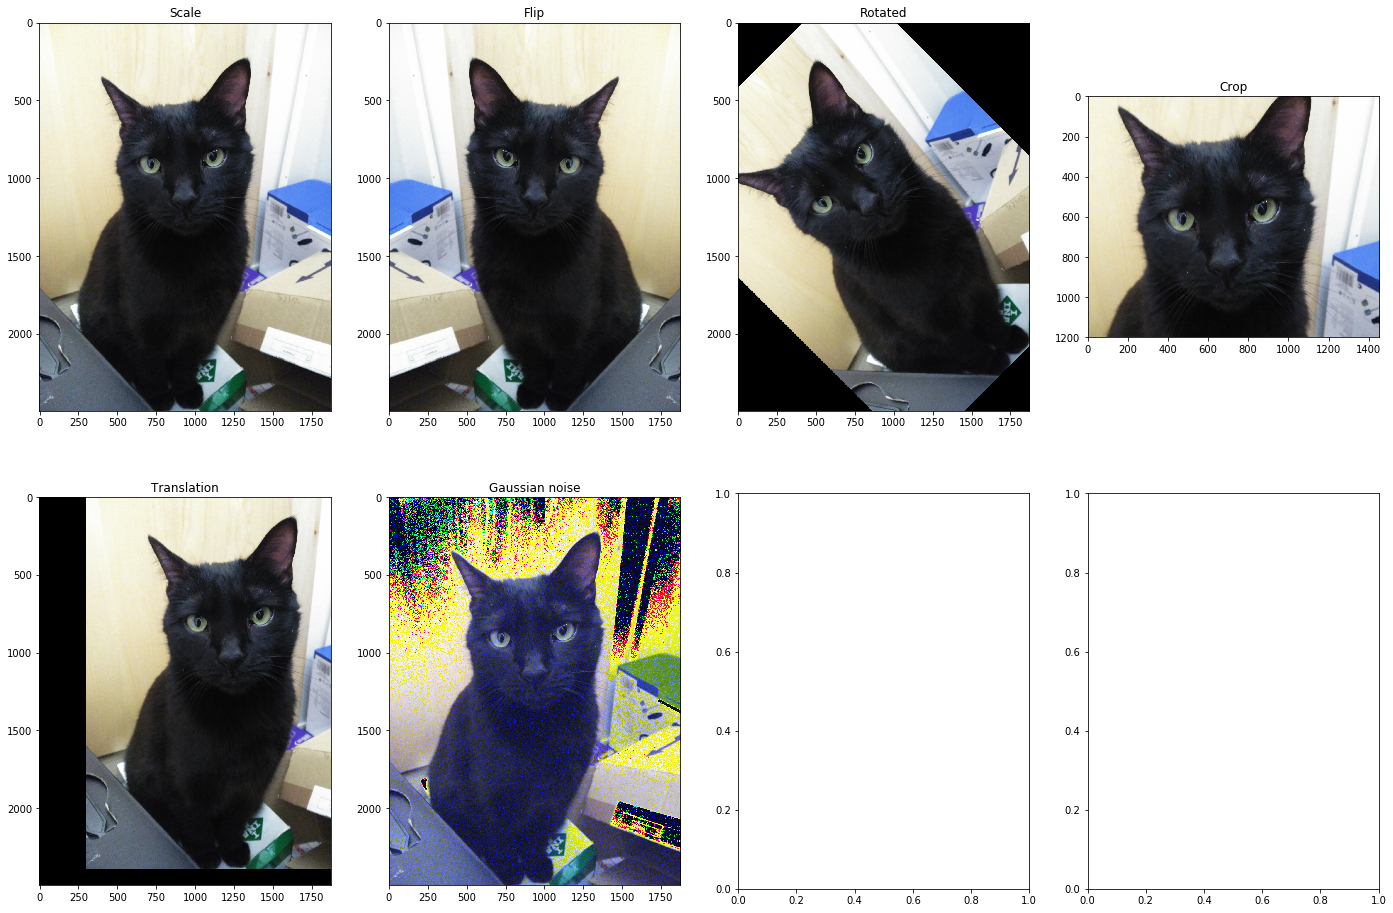

[ 24.  16.]


In [186]:
images = []

# reference image for other transformations
s_img = scale_image('./images/b_1.jpg') 
images.append([s_img, "Scale"])

images.append([flip_image(s_img), "Flip"])
images.append([rotate_image(s_img), "Rotated"])
images.append([crop_image(s_img), "Crop"])
images.append([translate_image(s_img), "Translation"])
images.append([gaussian_noise(s_img), "Gaussian noise"])

show_images(images)